This is solving MNist using a CNN - added as a direct comparison with MNist using a simple neural network (See MNist.ipynb)

The only difference between the two is that I add a series of convolutional layers. Everything else is exactly the same

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plot
import numpy as np
import random

Using TensorFlow backend.


In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
x_train[0].shape

(28, 28, 1)

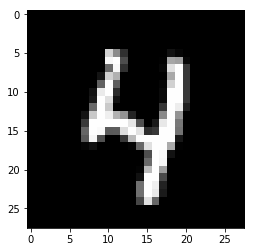

In [4]:
plot.imshow(random.choice(x_train).reshape(28, 28), cmap='gray')
plot.show()

Here, I add the convolutional layers. This is the same structure they used in their CIFAR-10 example (CIFAR-10 is a training set of images in ten categories including dogs, cats, cars, boats etc)

In [5]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

In [6]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 88s 1ms/step - loss: 1.8331 - acc: 0.8543
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0635 - acc: 0.9803
Epoch 3/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0422 - acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0323 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0275 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0215 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0183 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0139 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0152 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0124 - acc: 0.9960

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 396us/step


[0.098381214332633526, 0.98350000000000004]

Prediction:  6
--------------


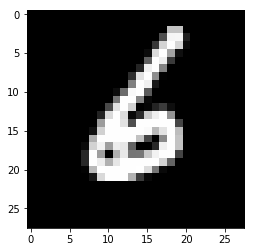

In [9]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()